In [51]:
from pathlib import Path
import os
compe='digit-recognizer'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [52]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [1]:
import torch
import numpy as np

In [12]:
ones=np.ones((2,3))
print(ones)

[[1. 1. 1.]
 [1. 1. 1.]]


In [5]:
tones=torch.ones((2,3))
print(tones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [10]:
print('np rands:',np.random.rand(2,3))
print('\n')
print(torch.rand(2,3))

np rands: [[0.11910481 0.52510122 0.27650032]
 [0.34164401 0.78921405 0.09333426]]


tensor([[0.2137, 0.4415, 0.0187],
        [0.4735, 0.2036, 0.7790]])


In [26]:
c=torch.from_numpy(ones)
d=c.numpy()
print(c.type)
print(c.shape)
print(type(d))
print(type(c))

print(d)

<built-in method type of Tensor object at 0x147302900>
torch.Size([2, 3])
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[[1. 1. 1.]
 [1. 1. 1.]]


In [43]:
print(tones.type)
print(tones.view(6).size())

print(torch.add(tones,tones))

print(torch.mul(tones,tones))
print(torch.div(tones,tones))
tone=torch.Tensor([1,2,3,4,5,6])
print(tone.mean())
print(tone.std())

<built-in method type of Tensor object at 0x144185090>
torch.Size([6])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor(3.5000)
tensor(1.8708)


In [44]:
from torch.autograd import Variable
var=Variable(torch.ones(3),requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [45]:
array=[2,4]
tens=torch.Tensor(array)
tens

tensor([2., 4.])

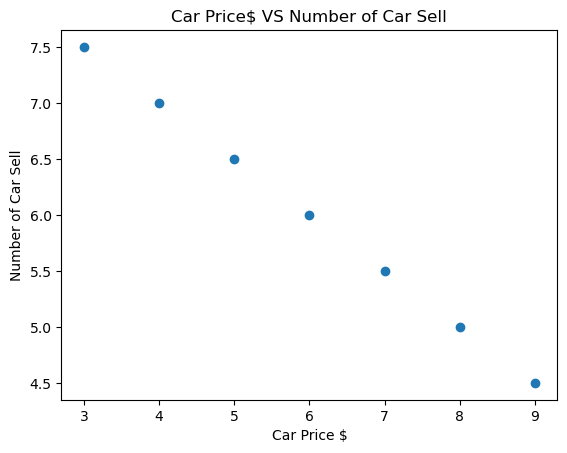

In [48]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epcho 0 and loss 16.792308807373047
epcho 50 and loss 4.500467777252197
epcho 100 and loss 3.0411550998687744
epcho 150 and loss 2.055035352706909
epcho 200 and loss 1.3886736631393433
epcho 250 and loss 0.9383856058120728
epcho 300 and loss 0.6341065168380737
epcho 350 and loss 0.42849183082580566
epcho 400 and loss 0.2895504832267761
epcho 450 and loss 0.1956615000963211
epcho 500 and loss 0.13221631944179535
epcho 550 and loss 0.08934441953897476
epcho 600 and loss 0.06037360429763794
epcho 650 and loss 0.04079689458012581
epcho 700 and loss 0.027568290010094643
epcho 750 and loss 0.01862889528274536
epcho 800 and loss 0.012588473036885262
epcho 850 and loss 0.008506543934345245
epcho 900 and loss 0.005748226307332516
epcho 950 and loss 0.0038842398207634687
epcho 1000 and loss 0.0026248202193528414


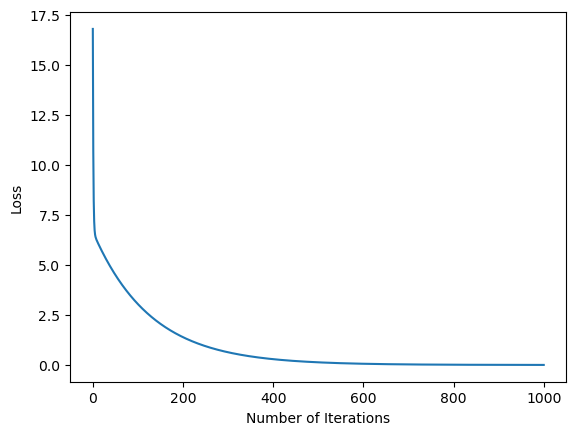

In [49]:
# Linear Regression with Pytorch

import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_list=[]
for i in range(1001):
    optimizer.zero_grad()
    results=model(car_price_tensor)
    loss=mse(results,number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(i%50==0):
        print(f'epcho {i} and loss {loss.data}')
plt.plot(range(1001),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


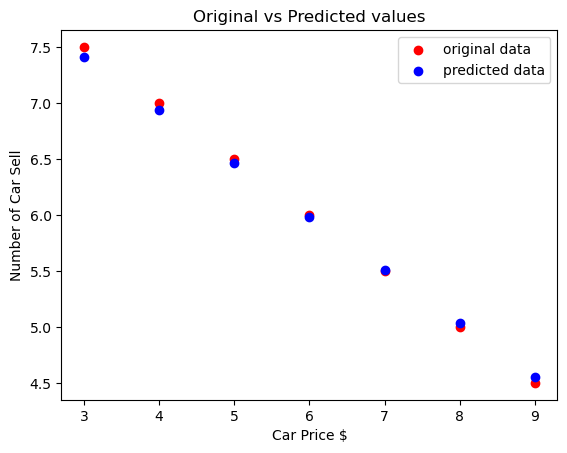

In [50]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

train = pd.read_csv(f'{compe}/train.csv',dtype = np.float32)


# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long


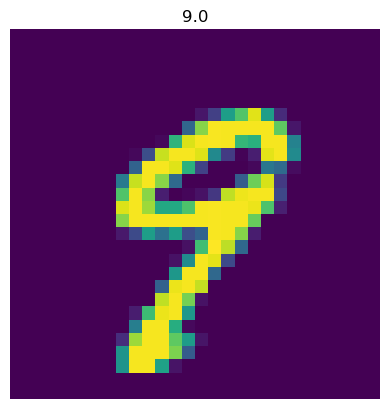

In [62]:

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[11].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[11]))
plt.savefig('graph.png')
plt.show()

In [63]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out


# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [64]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
       
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
               
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
                      
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))


Iteration: 500  Loss: 1.8134559392929077  Accuracy: 68.66666412353516%
Iteration: 1000  Loss: 1.5901384353637695  Accuracy: 75.30952453613281%
Iteration: 1500  Loss: 1.289411187171936  Accuracy: 78.35713958740234%
Iteration: 2000  Loss: 1.1928459405899048  Accuracy: 79.94047546386719%
Iteration: 2500  Loss: 1.0287599563598633  Accuracy: 81.1547622680664%
Iteration: 3000  Loss: 0.9400074481964111  Accuracy: 81.89286041259766%
Iteration: 3500  Loss: 0.8939893841743469  Accuracy: 82.57142639160156%
Iteration: 4000  Loss: 0.7445452213287354  Accuracy: 83.0%
Iteration: 4500  Loss: 0.9639540314674377  Accuracy: 83.39286041259766%
Iteration: 5000  Loss: 0.8047065734863281  Accuracy: 83.75%
Iteration: 5500  Loss: 0.7476291060447693  Accuracy: 84.02381134033203%
Iteration: 6000  Loss: 0.8808801770210266  Accuracy: 84.30952453613281%
Iteration: 6500  Loss: 0.6605674028396606  Accuracy: 84.55952453613281%
Iteration: 7000  Loss: 0.7112099528312683  Accuracy: 84.86904907226562%
Iteration: 7500  Los

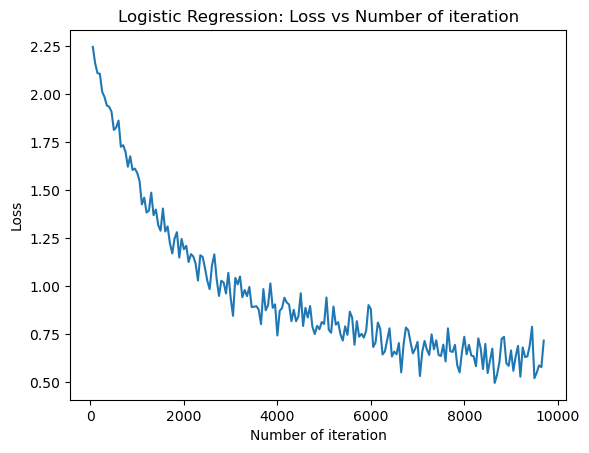

In [65]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [66]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [67]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
               
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


Iteration: 500  Loss: 0.1310492753982544  Accuracy: 96.20237731933594 %
Iteration: 1000  Loss: 0.0375635139644146  Accuracy: 97.57142639160156 %
Iteration: 1500  Loss: 0.036322370171546936  Accuracy: 97.64286041259766 %
Iteration: 2000  Loss: 0.024357140064239502  Accuracy: 98.11904907226562 %
